## Multiple Nodes and Edges

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [3]:
def first_node(state:AgentState) -> AgentState:
    """First node"""

    state['final'] = f"Hi {state['name']}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """Second node"""

    state['final'] = f"{state['final']} You are  {state['age']} years old!"
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("f_node", first_node)
graph.add_node("s_node", second_node)

graph.set_entry_point("f_node")
graph.add_edge("f_node","s_node")
graph.set_finish_point("s_node")

app = graph.compile()

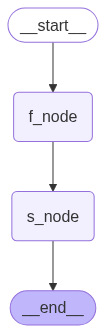

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
res = app.invoke({"name": "Peter", "age": "57"})
res["final"]

'Hi Peter! You are  57 years old!'